In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

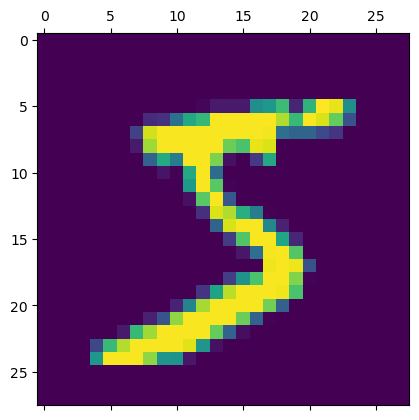

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train=X_train/255
X_test=X_test/255

## Using CNN for Classification

In [11]:
model=keras.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\91877\AJ\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9097 - loss: 0.3011
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9827 - loss: 0.0583
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9891 - loss: 0.0350
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9928 - loss: 0.0227
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9954 - loss: 0.0145


In [14]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0608


[0.048284146934747696, 0.9851999878883362]

In [15]:
predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [16]:
predicted_classes=np.argmax(predictions,axis=1)

In [18]:
single_image=np.expand_dims(X_test[0],axis=0)
predicted_class=np.argmax(model.predict(single_image),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [19]:
print('Predicted class for the first test image:', predicted_class[0])

Predicted class for the first test image: 7


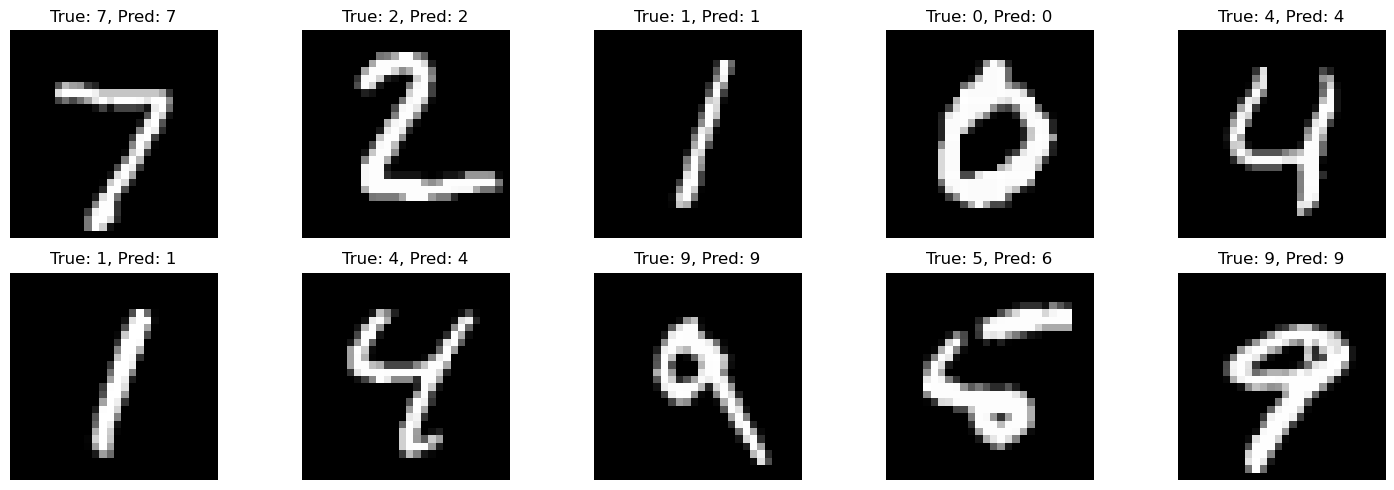

In [27]:
import matplotlib.pyplot as plt

def display_images(images, true_labels, predictions, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}, Pred: {predictions[i]}')
        plt.axis('off')  # Hide axes
    plt.tight_layout()  # Adjusts subplot params for a nicer fit
    plt.show()

# Display the first 10 test images with their true and predicted labels
display_images(X_test, y_test, predicted_classes, num=10)
